In [53]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
DATA_PATH = Path() / "../data"
#DATA_PATH = Path('/content/gdrive/My Drive/Colab Notebooks/VC_data_Cleaning_With_LLM/data')
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_csv(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_csv(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

def load_excel(filename, data_path=DATA_PATH):
    csv_path = data_path / filename
    return pd.read_excel(csv_path)

PLOT_PATH = Path() / "../plot"
#PLOT_PATH = Path('/content/gdrive/My Drive/Colab Notebooks/VC_data_Cleaning_With_LLM/plot')
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

RESULT_PATH = Path() / "../result"
#PLOT_PATH = Path('/content/gdrive/My Drive/Colab Notebooks/VC_data_Cleaning_With_LLM/plot')
RESULT_PATH.mkdir(parents=True,exist_ok=True)
def save_result(data, filename, data_path=RESULT_PATH):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False, encoding='utf-8-sig')

def save_excel(data, filename, data_path=RESULT_PATH):
    csv_path = data_path / filename
    data.to_excel(csv_path, index=False)


In [54]:
data = load_excel('final_dataset.xlsx')

### EDA

Saving figure follower_metrics_distribution


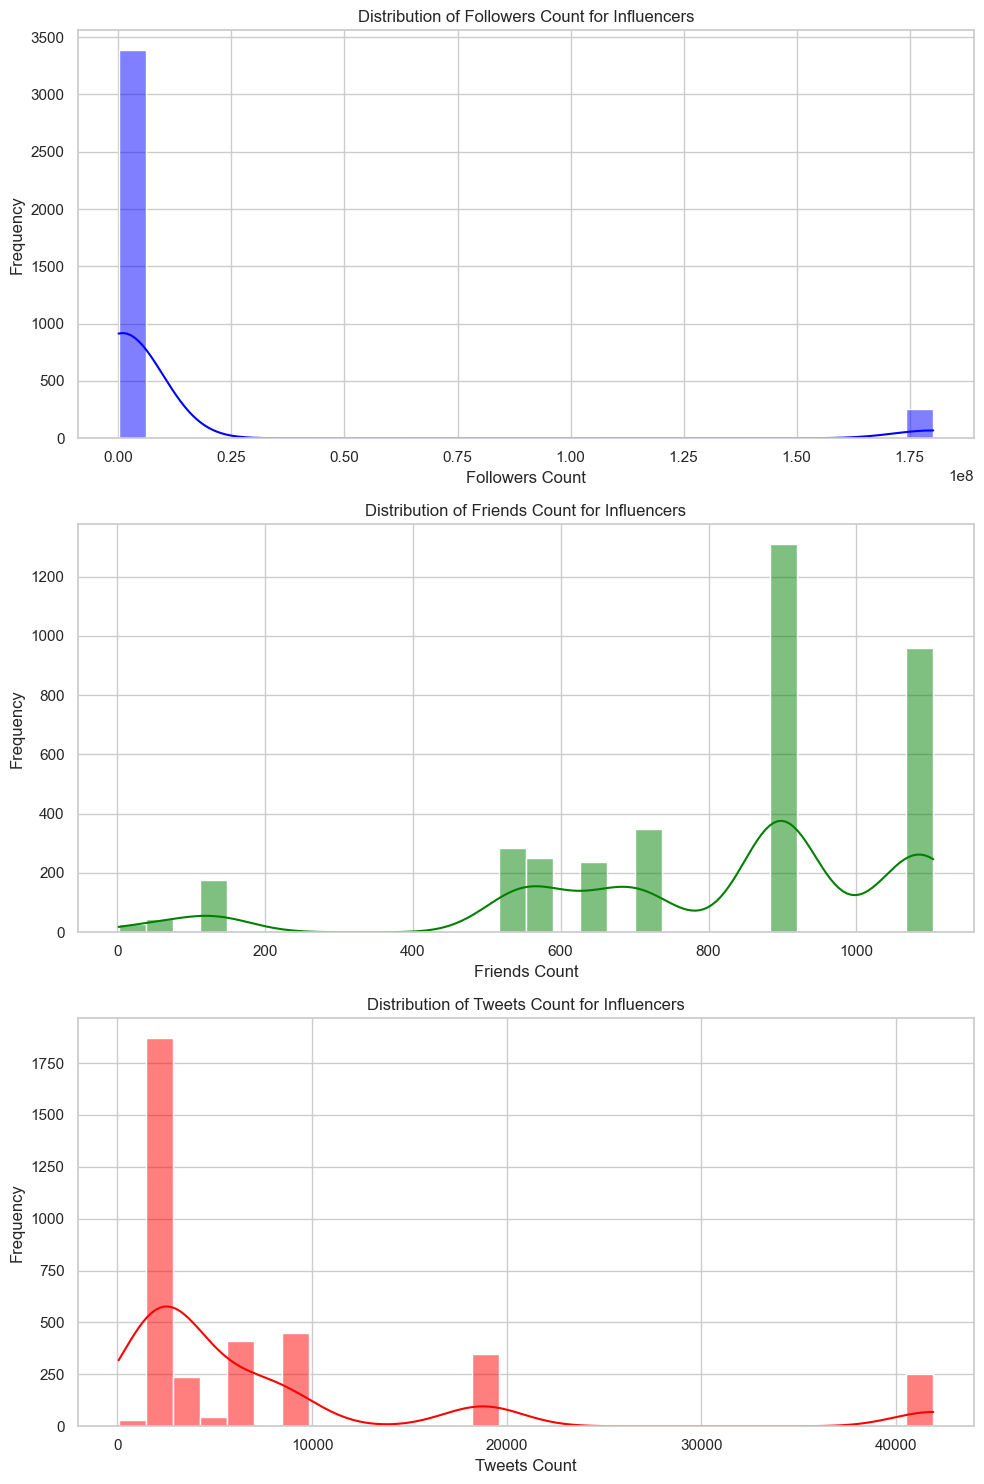

In [55]:
import seaborn as sns

# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Prepare the data for the distribution plots
data_follower_metrics = data[['followersCount_kol', 'friendsCount_kol', 'tweetsCount_kol']].dropna()

# Creating the plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Followers Count Distribution
sns.histplot(data_follower_metrics['followersCount_kol'], ax=axes[0], bins=30, kde=True, color='blue')
axes[0].set_title('Distribution of Followers Count for Influencers')
axes[0].set_xlabel('Followers Count')
axes[0].set_ylabel('Frequency')

# Friends Count Distribution
sns.histplot(data_follower_metrics['friendsCount_kol'], ax=axes[1], bins=30, kde=True, color='green')
axes[1].set_title('Distribution of Friends Count for Influencers')
axes[1].set_xlabel('Friends Count')
axes[1].set_ylabel('Frequency')

# Tweets Count Distribution
sns.histplot(data_follower_metrics['tweetsCount_kol'], ax=axes[2], bins=30, kde=True, color='red')
axes[2].set_title('Distribution of Tweets Count for Influencers')
axes[2].set_xlabel('Tweets Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
save_fig('follower_metrics_distribution')
plt.show()


Saving figure verification_status


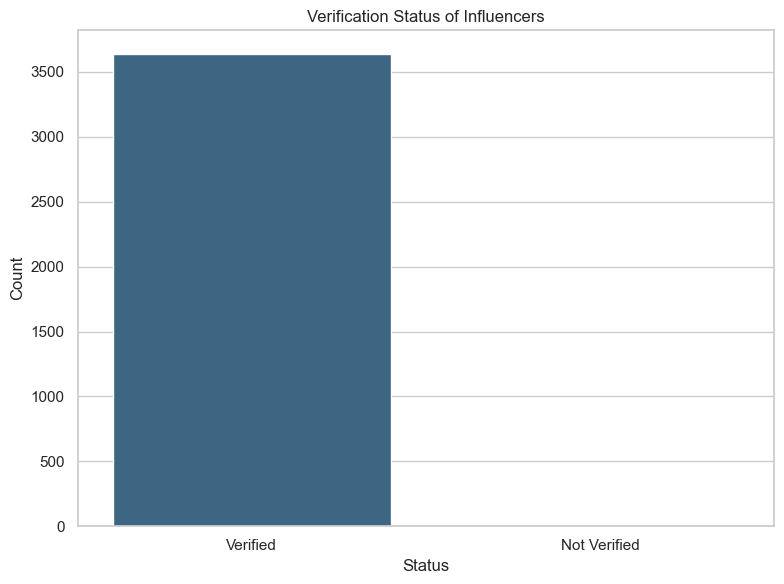

In [56]:
# Prepare the data for verification status visualization
verified_counts = data['certified_kol'].value_counts(dropna=False).rename(index={1.0: 'Verified', 0.0: 'Not Verified', pd.NA: 'Missing'})

# Plotting the verification status
plt.figure(figsize=(8, 6))
sns.barplot(x=verified_counts.index, y=verified_counts.values, palette='viridis')
plt.title('Verification Status of Influencers')
plt.xlabel('Status')
plt.ylabel('Count')
save_fig('verification_status')
plt.show()


Saving figure account_creation_trends


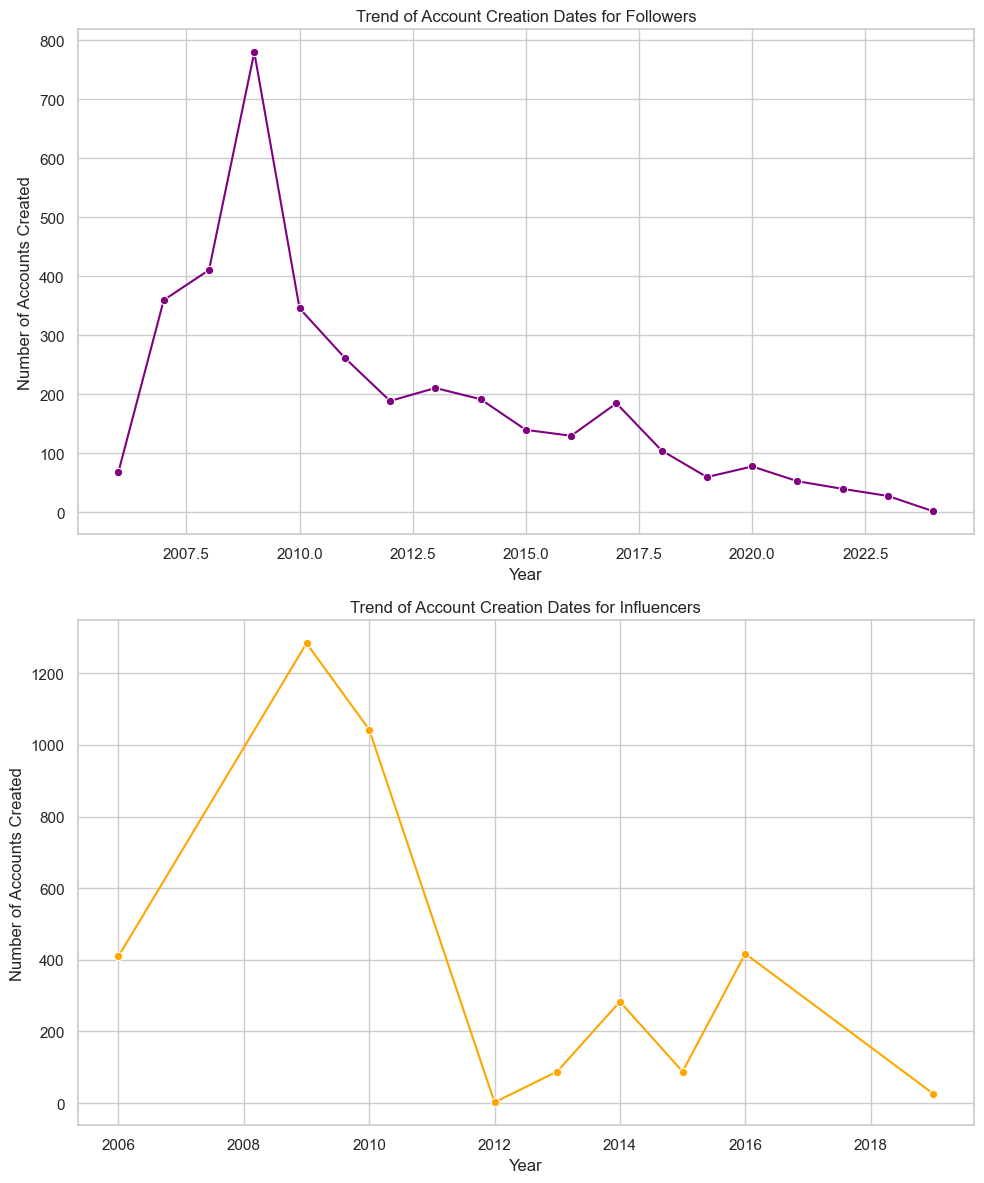

In [57]:
# Convert creation date columns to datetime
data['createdAt_fo'] = pd.to_datetime(data['createdAt_fo'], errors='coerce')
data['createdAt_kol'] = pd.to_datetime(data['createdAt_kol'], errors='coerce')

# Aggregate data by year for both followers and influencers
followers_creation_year = data['createdAt_fo'].dt.year.value_counts().sort_index()
influencers_creation_year = data['createdAt_kol'].dt.year.value_counts().sort_index()

# Plotting the creation trends
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.lineplot(x=followers_creation_year.index, y=followers_creation_year.values, ax=axes[0], marker='o', color='purple')
axes[0].set_title('Trend of Account Creation Dates for Followers')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Accounts Created')

sns.lineplot(x=influencers_creation_year.index, y=influencers_creation_year.values, ax=axes[1], marker='o', color='orange')
axes[1].set_title('Trend of Account Creation Dates for Influencers')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Accounts Created')

plt.tight_layout()
save_fig('account_creation_trends')
plt.show()


Saving figure tweets_followers_correlation


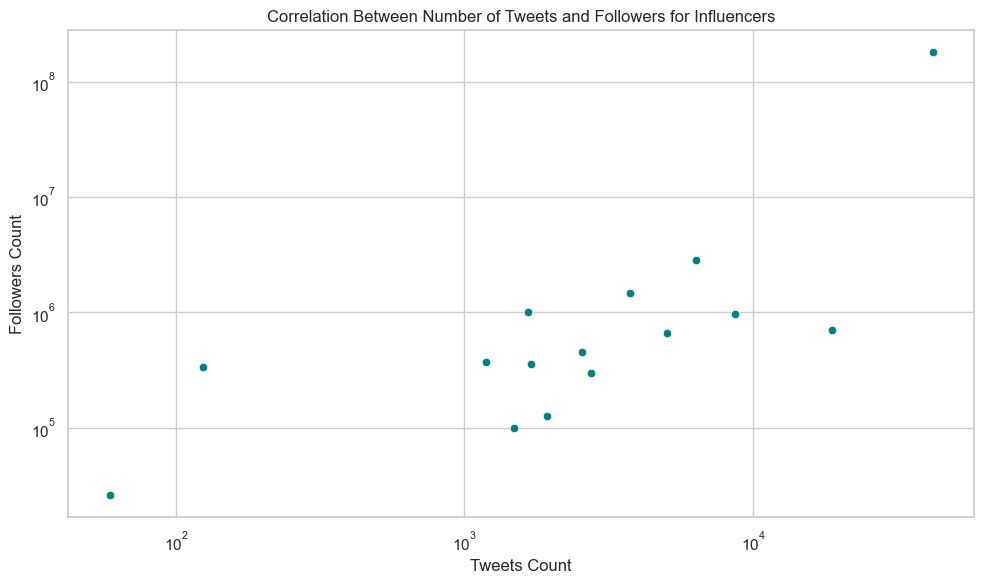

In [58]:
# Correlation analysis between the number of followers and tweets for influencers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tweetsCount_kol', y='followersCount_kol', data=data, color='teal')
plt.title('Correlation Between Number of Tweets and Followers for Influencers')
plt.xlabel('Tweets Count')
plt.ylabel('Followers Count')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
save_fig('tweets_followers_correlation')
plt.show()


There seems to be a positive relationship, indicating that higher tweet counts often correlate with higher numbers of followers. This suggests that active tweeting could be associated with greater visibility and potentially more followers.

Saving figure geographical_distribution


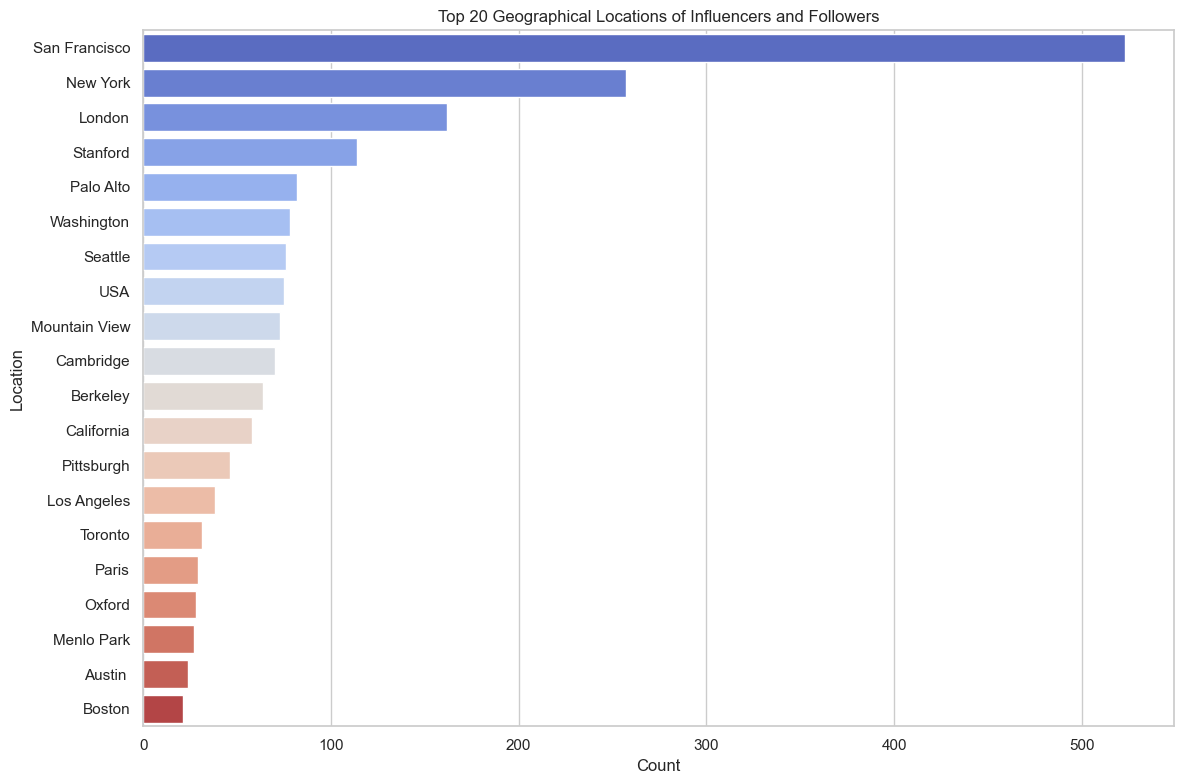

In [59]:
# Analyze the geographical distribution using the 'location_cleansed' column
location_counts = data['location_cleansed'].value_counts().head(20)  # Top 20 locations

# Plotting the geographic distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='coolwarm')
plt.title('Top 20 Geographical Locations of Influencers and Followers')
plt.xlabel('Count')
plt.ylabel('Location')
save_fig('geographical_distribution')
plt.show()


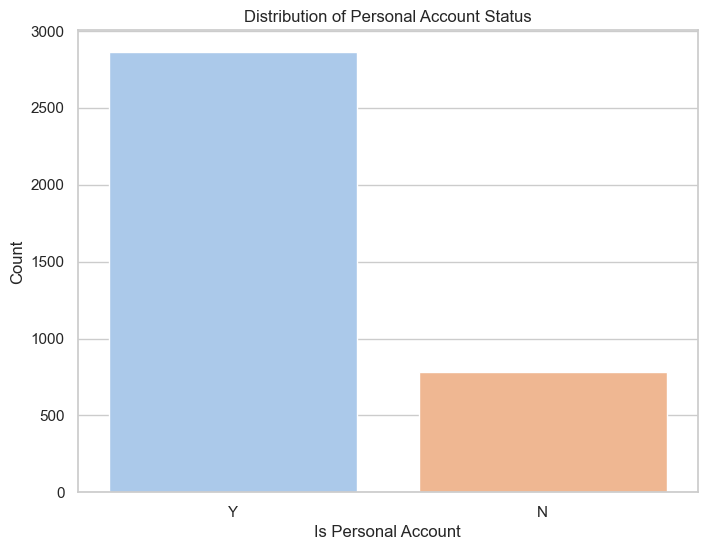

In [60]:
# Analyzing the 'if personal account' column
personal_account_counts = data['if personal account'].value_counts(dropna=False)

# Plotting the distribution of personal account status
plt.figure(figsize=(8, 6))
sns.barplot(x=personal_account_counts.index, y=personal_account_counts.values, palette='pastel')
plt.title('Distribution of Personal Account Status')
plt.xlabel('Is Personal Account')
plt.ylabel('Count')
plt.show()


Saving figure top_positions_organizations


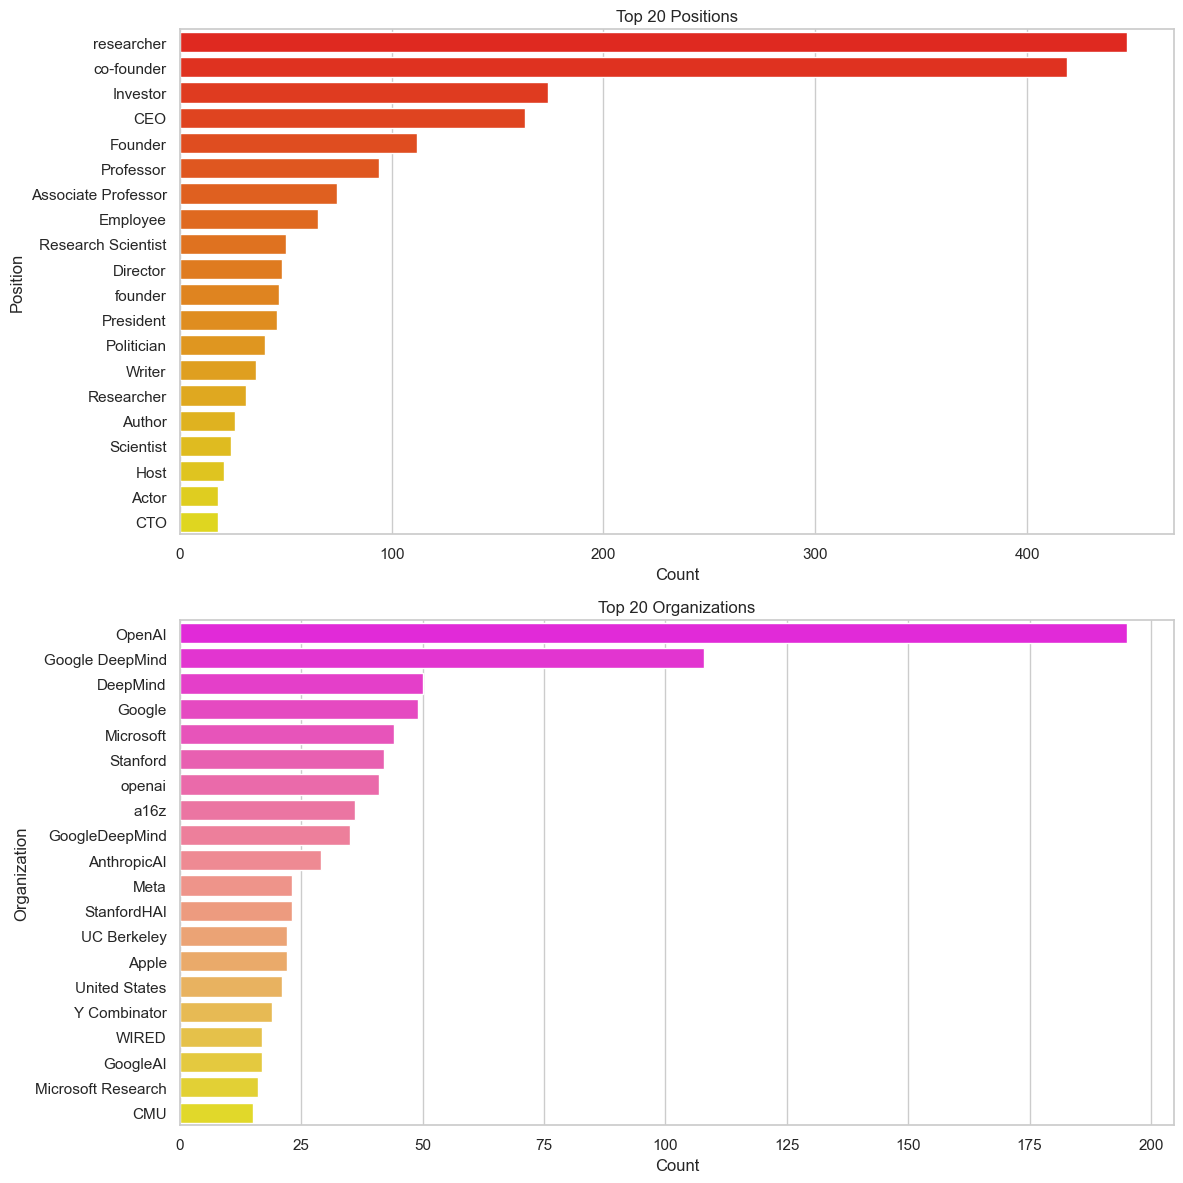

In [61]:
# Analyzing the 'Position' and 'Organization' columns
position_counts = data['Position'].value_counts().head(20)  # Top 20 positions
organization_counts = data['Organization'].value_counts().head(20)  # Top 20 organizations

# Plotting the common roles and organizations
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
sns.barplot(x=position_counts.values, y=position_counts.index, palette='autumn', ax=axes[0])
axes[0].set_title('Top 20 Positions')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Position')

sns.barplot(x=organization_counts.values, y=organization_counts.index, palette='spring', ax=axes[1])
axes[1].set_title('Top 20 Organizations')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Organization')

plt.tight_layout()
save_fig('top_positions_organizations')
plt.show()


### Network Visualization

Saving figure network_graph


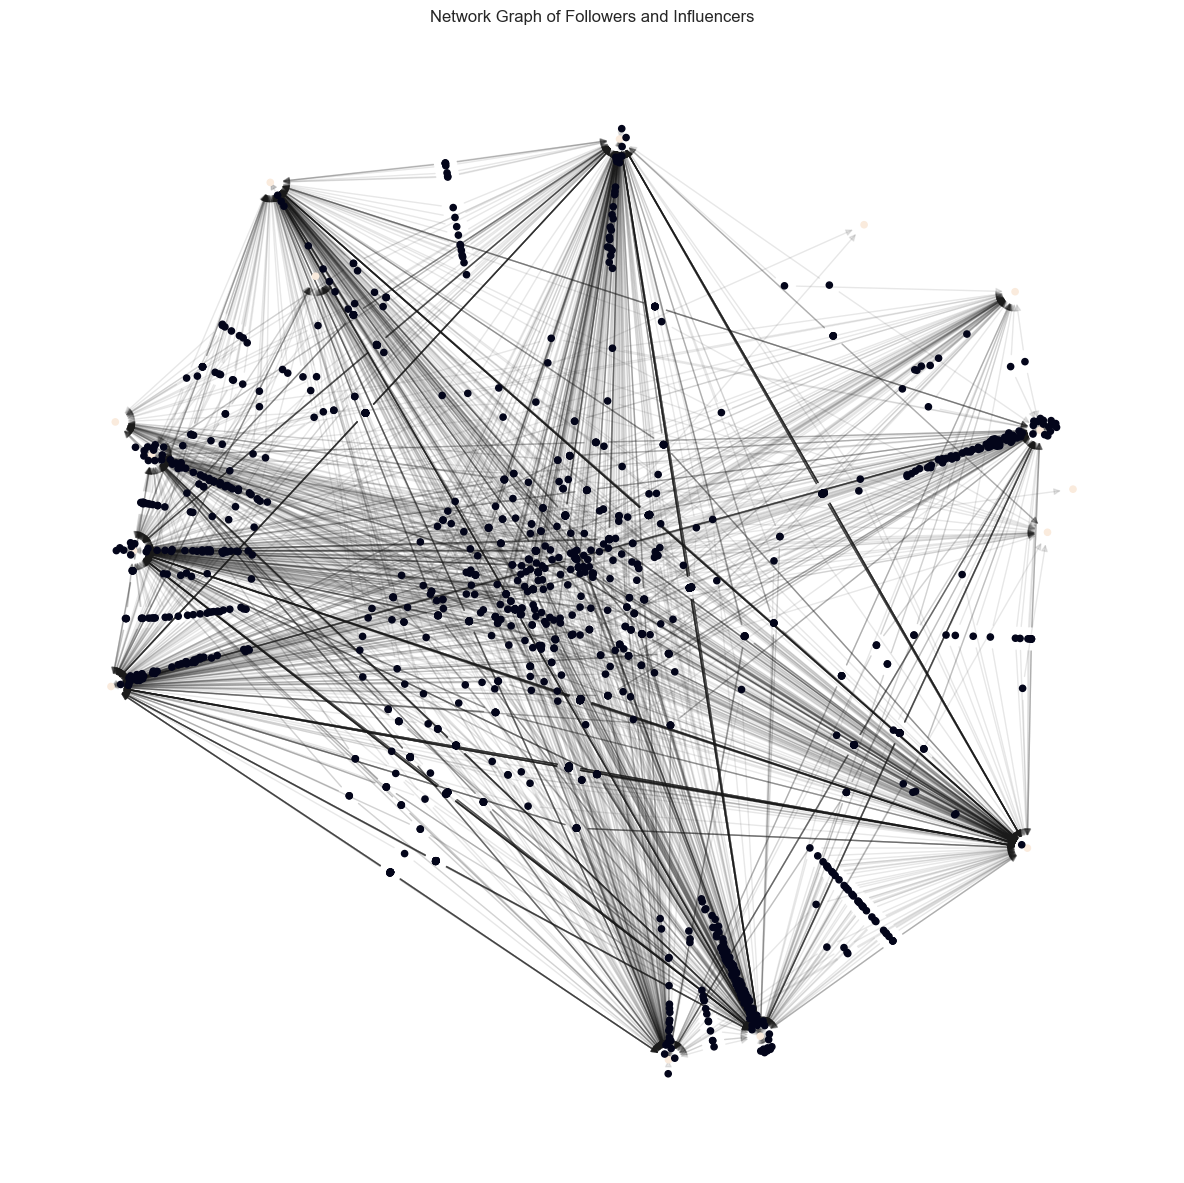

In [62]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Adding nodes and edges from the dataset
# We use name_fo for follower nodes and screenName_kol for influencer nodes
for _, row in data[['name_fo', 'screenName_kol']].dropna().iterrows():
    G.add_node(row['name_fo'], type='follower')
    G.add_node(row['screenName_kol'], type='influencer')
    G.add_edge(row['name_fo'], row['screenName_kol'])

# Visualizing the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=[G.nodes[n]['type'] == 'influencer' for n in G])
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.title('Network Graph of Followers and Influencers')
plt.axis('off')  # Turn off the axis
save_fig('network_graph')
plt.show()


In [63]:
# Calculating degree centrality for the nodes in the graph (focusing on incoming connections for influencers)
degree_centrality = nx.in_degree_centrality(G)

# Sorting nodes by degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 influencers with the highest degree centrality
top_influencers = [(node, centrality) for node, centrality in sorted_degree_centrality if G.nodes[node]['type'] == 'influencer'][:10]
top_influencers


[('drfeifei', 0.37105624142661175),
 ('AndrewYNg', 0.3100137174211248),
 ('karpathy', 0.3052126200274348),
 ('goodfellow_ian', 0.28532235939643347),
 ('sama', 0.27777777777777773),
 ('ylecun', 0.2400548696844993),
 ('mustafasuleyman', 0.19341563786008228),
 ('elonmusk', 0.17215363511659806),
 ('kaifulee', 0.16049382716049382),
 ('rsalakhu', 0.06035665294924554)]

Saving figure reduced_network_graph


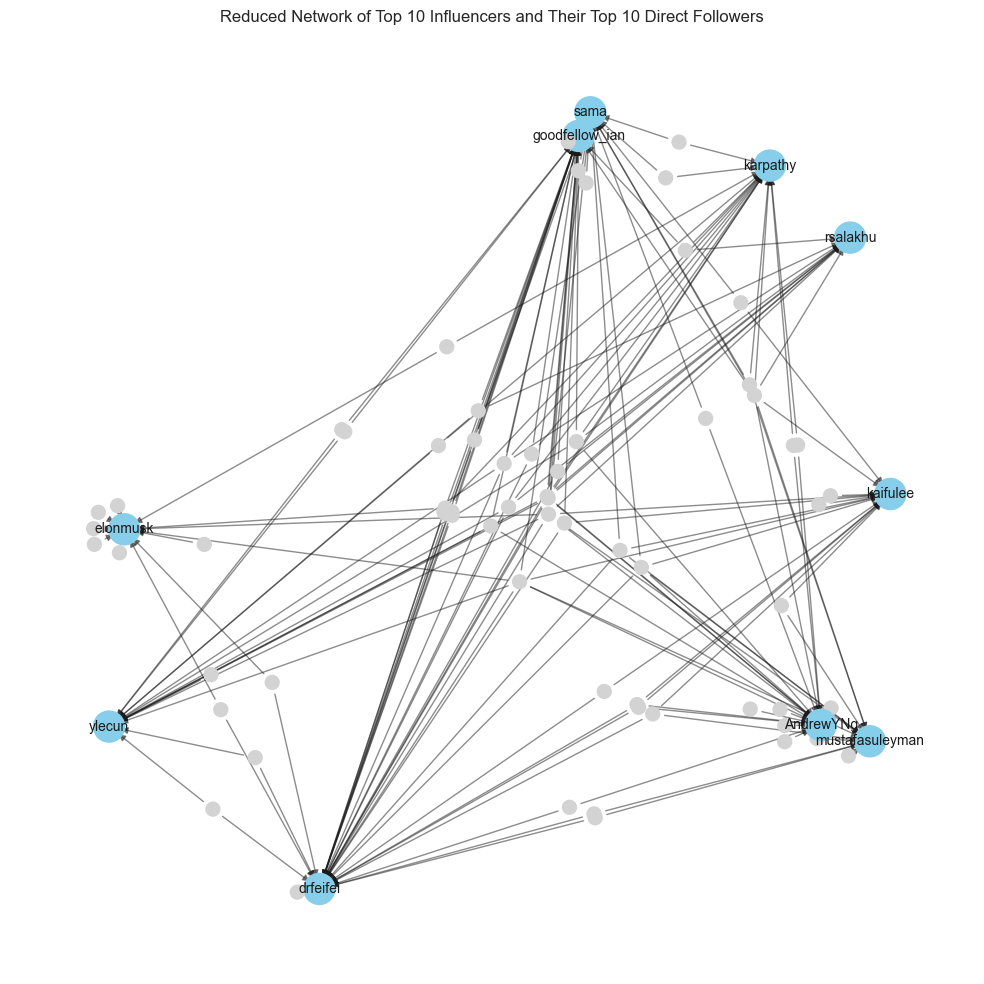

In [64]:
# Reducing the complexity by focusing on the top 5 influencers and their top 5 direct followers
top_10_influencers_nodes = [node for node, _ in top_influencers[:10]]  # Extract the top 5 influencers
subgraph_nodes_reduced = set(top_10_influencers_nodes)  # Start with the top 5 influencers

# Add top 5 followers directly connected to these top 5 influencers
for influencer in top_10_influencers_nodes:
    top_followers = list(G.predecessors(influencer))[:10]
    subgraph_nodes_reduced.update(top_followers)

# Create the reduced subgraph
subG_reduced = G.subgraph(subgraph_nodes_reduced)

# Visualizing the reduced subgraph
plt.figure(figsize=(10, 10))
pos_reduced = nx.spring_layout(subG_reduced, seed=42)  # Positions for all nodes
node_colors_reduced = ['skyblue' if node in top_10_influencers_nodes else 'lightgrey' for node in subG_reduced]
node_sizes_reduced = [500 if node in top_10_influencers_nodes else 100 for node in subG_reduced]
nx.draw_networkx_nodes(subG_reduced, pos_reduced, node_color=node_colors_reduced, node_size=node_sizes_reduced)
nx.draw_networkx_edges(subG_reduced, pos_reduced, alpha=0.5)
nx.draw_networkx_labels(subG_reduced, pos_reduced, labels={node: node for node in top_10_influencers_nodes}, font_size=10)

plt.title('Reduced Network of Top 10 Influencers and Their Top 10 Direct Followers')
plt.axis('off')  # Turn off the axis
save_fig('reduced_network_graph')
plt.show()


In [65]:
# Calculate network metrics
degree_centrality = nx.degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
clossness_centrality = nx.closeness_centrality(G)

# Prepare the data for display
centrality_measures = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'In-Degree Centrality': in_degree_centrality,
    'Out-Degree Centrality': out_degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality,
    'Closeness Centrality': clossness_centrality
})

# Display the top 15 nodes by in-degree centrality
top_nodes_by_in_degree = centrality_measures.sort_values(by='In-Degree Centrality', ascending=False).head(15)
top_nodes_by_in_degree


Degree Centrality  In-Degree Centrality  \
drfeifei                  0.371056              0.371056   
AndrewYNg                 0.310014              0.310014   
karpathy                  0.305213              0.305213   
goodfellow_ian            0.285322              0.285322   
sama                      0.277778              0.277778   
ylecun                    0.240055              0.240055   
mustafasuleyman           0.193416              0.193416   
elonmusk                  0.172154              0.172154   
kaifulee                  0.160494              0.160494   
rsalakhu                  0.060357              0.060357   
demishassabis             0.059671              0.059671   
gdb                       0.031550              0.031550   
geoffreyhinton            0.017833              0.017833   
DaphneKoller              0.001372              0.001372   
ilyasut                   0.000686              0.000686   

                 Out-Degree Centrality  Betweenness Centrality  \
drfeifei                           0.0                     0.0   
AndrewYNg                          0.0                     0.0   
karpathy                           0.0                     0.0   
goodfellow_ian                     0.0                     0.0   
sama                               0.0                     0.0   
ylecun                             0.0                     0.0   
mustafasuleyman                    0.0                     0.0   
elonmusk                           0.0                     0.0   
kaifulee                           0.0                     0.0   
rsalakhu                           0.0                     0.0   
demishassabis                      0.0                     0.0   
gdb                                0.0                     0.0   
geoffreyhinton                     0.0                     0.0   
DaphneKoller                       0.0                     0.0   
ilyasut                            0.0                     0.0   

                 Eigenvector Centrality  Closeness Centrality  
drfeifei                       0.124483              0.371056  
AndrewYNg                     -0.068544              0.310014  
karpathy                      -0.061457              0.305213  
goodfellow_ian                 0.150133              0.285322  
sama                          -0.529085              0.277778  
ylecun                         0.360383              0.240055  
mustafasuleyman                0.360928              0.193416  
elonmusk                      -0.336903              0.172154  
kaifulee                       0.219174              0.160494  
rsalakhu                      -0.080330              0.060357  
demishassabis                  0.265611              0.059671  
gdb                            0.399901              0.031550  
geoffreyhinton                -0.120790              0.017833  
DaphneKoller                   0.013369              0.001372  
ilyasut                       -0.013455              0.000686

Saving figure influencers_network


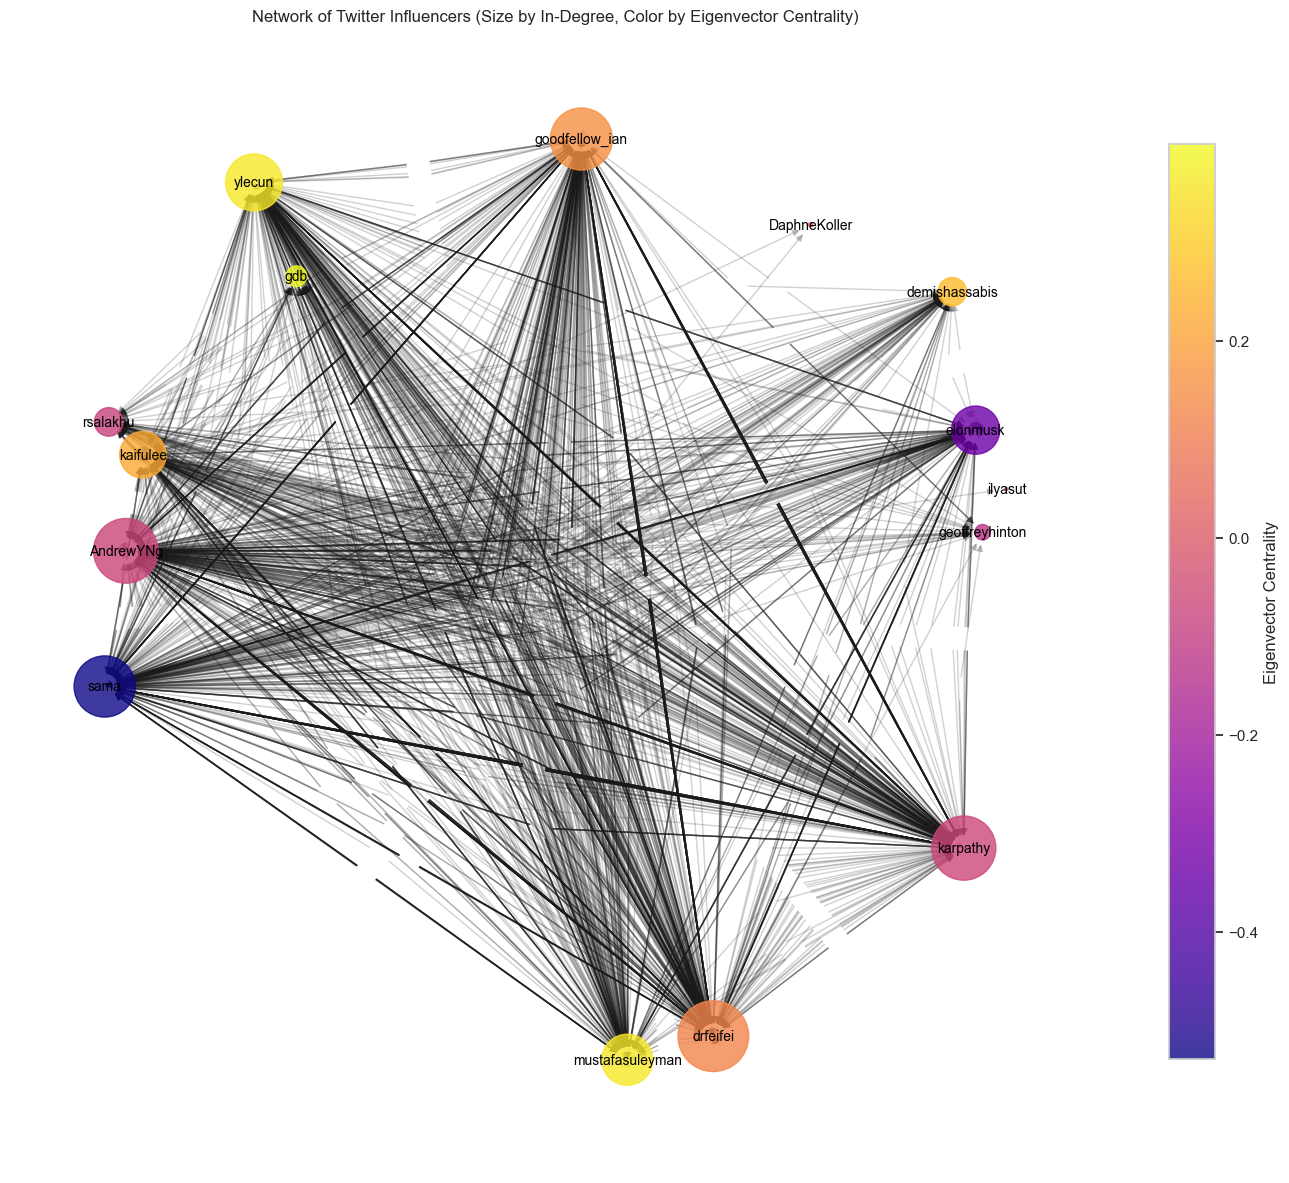

In [66]:
# Set up the graph visualization
fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# Nodes
node_sizes = [in_degree_centrality[n] * 7000 for n in G]  # Scale in-degree centrality for visibility
node_colors = [eigenvector_centrality[n] for n in G]  # Color by eigenvector centrality

# Draw the nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, 
                               cmap=plt.cm.plasma, alpha=0.8, ax=ax)

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)

# Draw labels for top 10 by in-degree centrality
top_labels = {n: n for n in top_nodes_by_in_degree.index}
nx.draw_networkx_labels(G, pos, labels=top_labels, font_size=10, font_color='black', ax=ax)

# Colorbar for eigenvector centrality
plt.colorbar(nodes, label='Eigenvector Centrality', shrink=0.8)

ax.set_title('Network of Twitter Influencers (Size by In-Degree, Color by Eigenvector Centrality)')
plt.axis('off')  # Hide axes
save_fig('influencers_network')
plt.show()


In [67]:
# Identifying the top 10 influencers
top_10_influencers = top_nodes_by_in_degree.head(10).index.tolist()

# Extracting additional details for these top influencers
influencer_details = data[data['screenName_kol'].isin(top_10_influencers)][[
    'screenName_kol', 'name_kol', 'position_categorized', 'ai_related', 'highest_level_org'
]].drop_duplicates('screenName_kol').set_index('screenName_kol')

# Focusing on the relevant information
top_10_influencer_details = influencer_details.loc[top_10_influencers]
top_10_influencer_details


name_kol    position_categorized ai_related  \
screenName_kol                                                           
drfeifei                 Fei-Fei Li                     NaN          N   
AndrewYNg                 Andrew Ng          Public Figures          N   
karpathy            Andrej Karpathy  Researcher & Scientist          Y   
goodfellow_ian       Ian Goodfellow                     NaN          N   
sama                     Sam Altman                     NaN          N   
ylecun                   Yann LeCun  Researcher & Scientist          Y   
mustafasuleyman    Mustafa Suleyman          Public Figures          N   
elonmusk                  Elon Musk                     NaN          N   
kaifulee                 Kai-Fu Lee              Politician          N   
rsalakhu         Russ Salakhutdinov  Researcher & Scientist          Y   

                                 highest_level_org  
screenName_kol                                      
drfeifei                                       NaN  
AndrewYNg                           New York Times  
karpathy                                    Google  
goodfellow_ian                                 NaN  
sama                                           NaN  
ylecun                                      Google  
mustafasuleyman  Here Comes The Guillotine Podcast  
elonmusk                                       NaN  
kaifulee                                Government  
rsalakhu                    University of Maryland

Saving figure top_influencers_networks


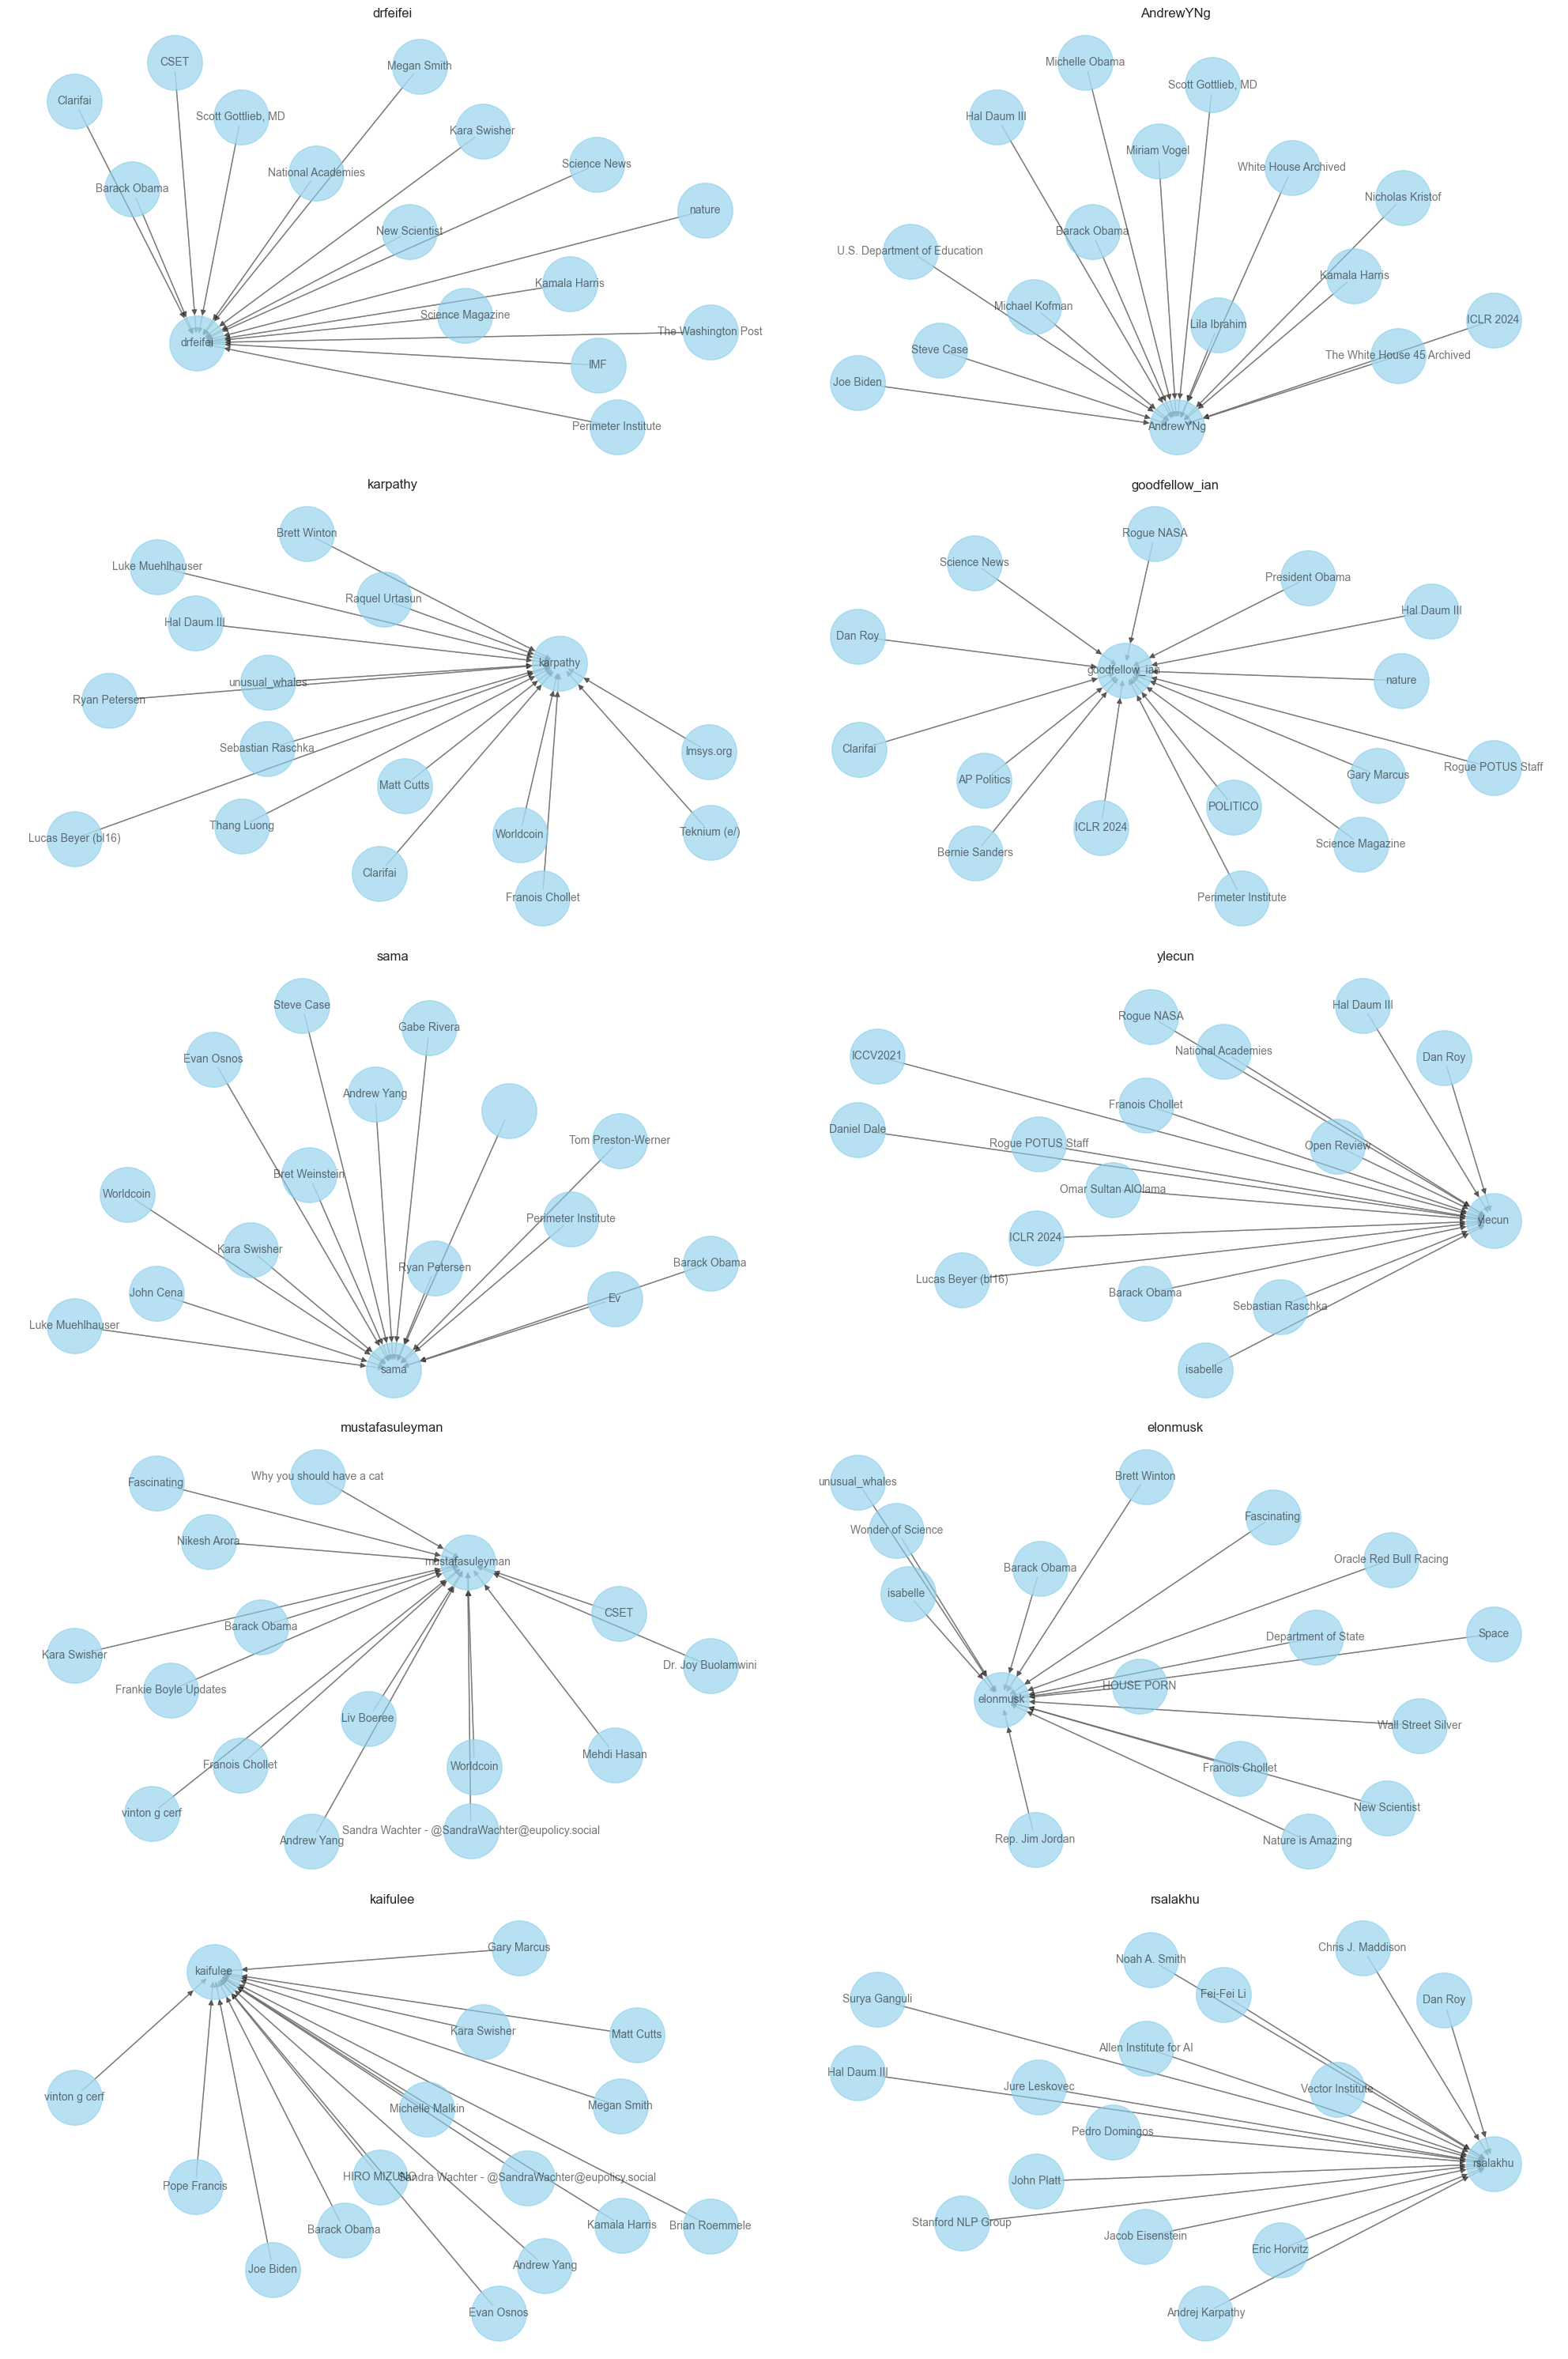

In [68]:
# Prepare figures to display network visualizations for each top influencer
fig, axes = plt.subplots(5, 2, figsize=(20, 30))  # Grid layout for 10 influencers
axes = axes.flatten()  # Flatten to make it easier to index

for idx, influencer in enumerate(top_10_influencers):
    # Get up to 15 direct followers for the influencer
    top_followers = list(G.predecessors(influencer))[:15]
    nodes = [influencer] + top_followers
    subgraph = G.subgraph(nodes)
    
    # Positioning and drawing the subgraph
    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, ax=axes[idx], with_labels=True, node_color='skyblue', node_size=2500, font_size=10, alpha=0.6)
    nx.draw_networkx_edges(subgraph, pos, ax=axes[idx], edge_color='gray', alpha=0.5)
    axes[idx].set_title(influencer)
    axes[idx].axis('off')

plt.tight_layout()
save_fig('top_influencers_networks')
plt.show()


Saving figure ai_influencers_networks


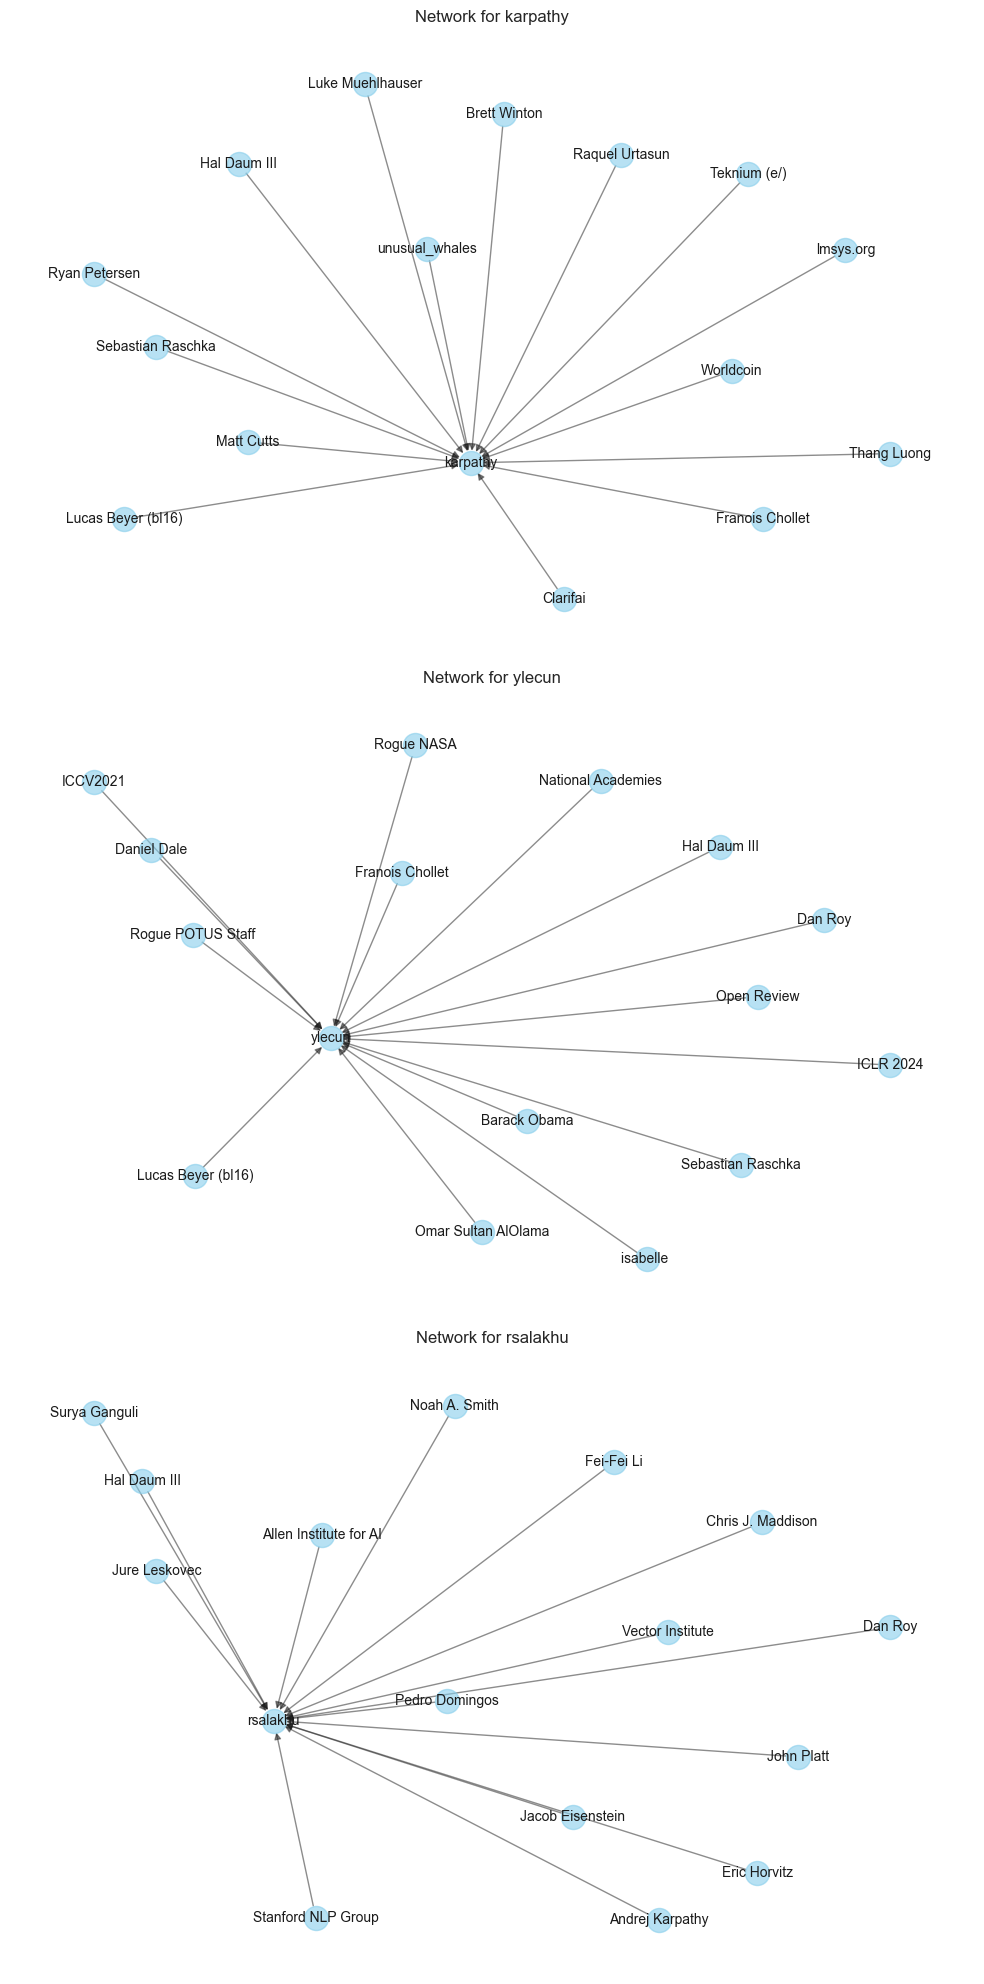

In [69]:
# Filter the top influencers who are AI-related
ai_related_top_influencers = top_10_influencer_details[top_10_influencer_details['ai_related'] == 'Y'].index.tolist()

# Prepare subgraphs for each AI-related influencer
fig, axes = plt.subplots(len(ai_related_top_influencers), 1, figsize=(10, 20))
if len(ai_related_top_influencers) == 1:
    axes = [axes]  # To handle the case of a single subplot

for i, influencer in enumerate(ai_related_top_influencers):
    # Get the top 15 connections for each influencer
    followers = list(G.predecessors(influencer))[:15]  # Get the top 15 followers directly connected to the influencer
    nodes_to_include = followers + [influencer]
    subG_ai = G.subgraph(nodes_to_include)

    # Setup positions for the nodes
    pos_ai = nx.spring_layout(subG_ai, seed=42)

    # Draw the subgraph
    nx.draw_networkx_nodes(subG_ai, pos_ai, node_size=300, node_color='skyblue', alpha=0.6, ax=axes[i])
    nx.draw_networkx_edges(subG_ai, pos_ai, alpha=0.5, ax=axes[i])
    nx.draw_networkx_labels(subG_ai, pos_ai, font_size=10, ax=axes[i])

    axes[i].set_title(f'Network for {influencer}')
    axes[i].axis('off')  # Hide axes

plt.tight_layout()
save_fig('ai_influencers_networks')
plt.show()


Saving figure bipartite_graph


C:\Users\TYS\AppData\Local\Temp\ipykernel_33608\1214117181.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


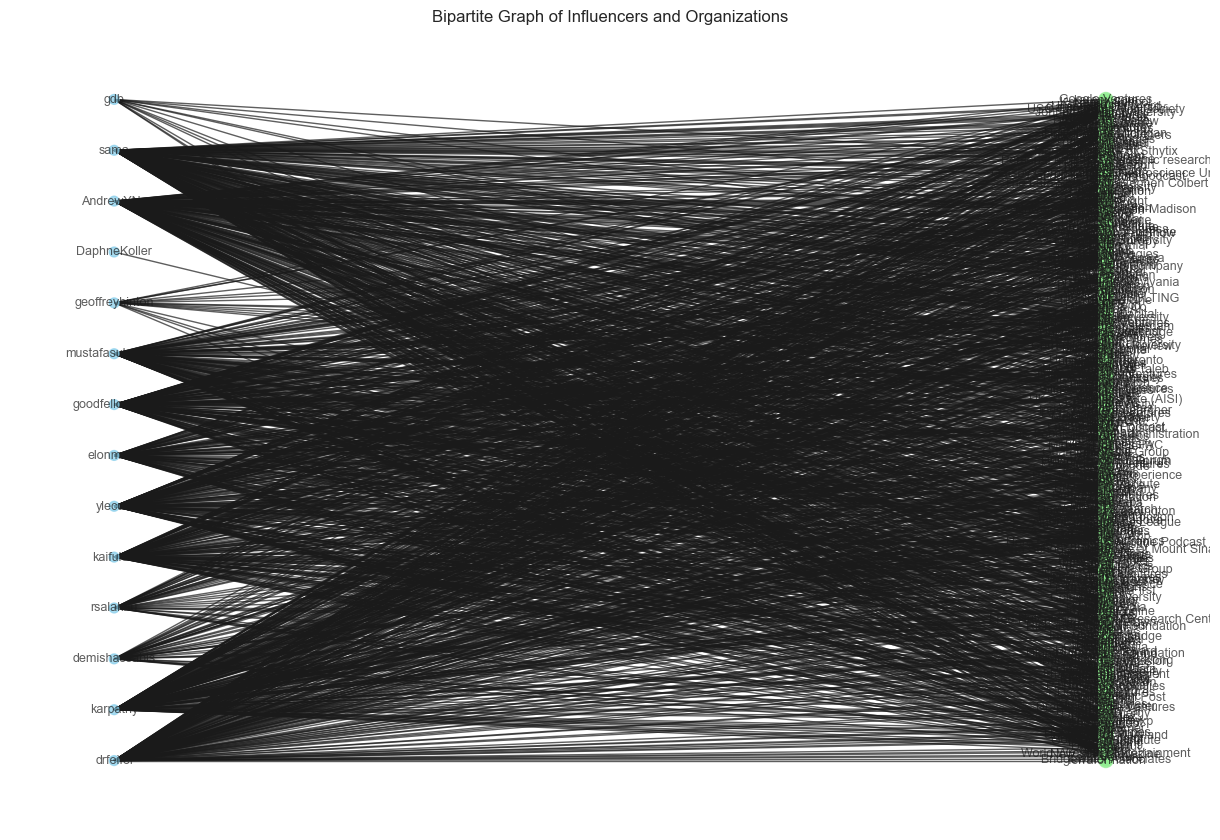

In [70]:
# Assuming 'data' is your DataFrame containing the necessary columns
# Filter out rows where the organization data might be missing
data_filtered = data.dropna(subset=['highest_level_org'])

# Create a bipartite graph
B = nx.Graph()

# Add nodes for influencers and organizations
B.add_nodes_from(data_filtered['screenName_kol'], bipartite=0, node_color='skyblue', node_size=50)
B.add_nodes_from(data_filtered['highest_level_org'], bipartite=1, node_color='lightgreen', node_size=100)

# Add edges based on associations between influencers and organizations
for _, row in data_filtered.iterrows():
    B.add_edge(row['screenName_kol'], row['highest_level_org'])

# Separate the node sets
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
bottom_nodes = set(B) - top_nodes

# Position the nodes in two columns
pos = nx.bipartite_layout(B, top_nodes)

# Draw the bipartite graph
plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=True, node_color=[data['node_color'] for _, data in B.nodes(data=True)],
        node_size=[data['node_size'] for _, data in B.nodes(data=True)], font_size=9, alpha=0.7)

# Show the plot
plt.title('Bipartite Graph of Influencers and Organizations')
plt.axis('off')  # Turn off the axis
save_fig('bipartite_graph')
plt.show()

